In [1]:
import pandas as pd 

In [3]:
### Merging 12 months of sales data into a single file

In [4]:
# List of file paths for each month
file_paths = [
    'Sales_Data/Sales_January_2019.csv',
    'Sales_Data/Sales_February_2019.csv',
    'Sales_Data/Sales_March_2019.csv',
    'Sales_Data/Sales_April_2019.csv',
    'Sales_Data/Sales_May_2019.csv',
    # Include the remaining months here...
    'Sales_Data/Sales_June_2019.csv',
    'Sales_Data/Sales_July_2019.csv',
    'Sales_Data/Sales_August_2019.csv',
    'Sales_Data/Sales_September_2019.csv',
    'Sales_Data/Sales_October_2019.csv',
    'Sales_Data/Sales_November_2019.csv',
    'Sales_Data/Sales_December_2019.csv'
]

# Read each CSV file into a DataFrame and concatenate them
dfs = [pd.read_csv(f) for f in file_paths]
merged_data = pd.concat(dfs, ignore_index=True)

# Save the merged data to a new CSV file
merged_data.to_csv('Sales.csv', index=False)


In [5]:
sales = pd.read_csv("Sales.csv")

In [7]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [20]:
sales.dropna(inplace=True)
sales ['Month'] = sales['Order Date'].str[0:2]
# Assuming 'Or' is an unexpected value in the 'Month' column
sales = sales[sales['Month'].str.isnumeric()]

# Now, convert 'Month' to integers
sales['Month'] = sales['Month'].astype('int32')

In [24]:
sales['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [26]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [28]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [32]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])

In [33]:
sales.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [34]:
sales ['Sales'] = sales['Quantity Ordered'] * sales ['Price Each']

In [41]:
results = sales.groupby('Month').sum()

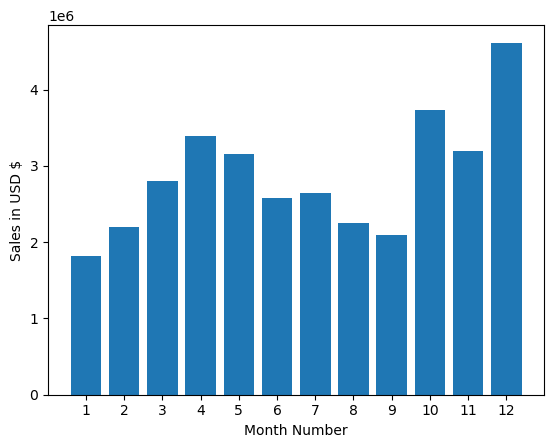

In [44]:
import matplotlib.pyplot as plt
months =  range (1,13)
plt.bar(months , results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD $")
plt.xlabel("Month Number")
plt.show()

In [45]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [57]:
def get_state(address):
    return address.split(",")[2].split(' ')[1]

    
sales['City'] = sales['Purchase Address'].apply( lambda x : x.split(',')[1] + " "+ get_state(x))

In [58]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [61]:
results = sales.groupby('City').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta GA,1412531412611412811412891412961413111413471413...,AA Batteries (4-pack)USB-C Charging CableLight...,16602,2779908.20,01/17/19 00:0901/09/19 18:1401/05/19 16:5101/2...,"385 11th St, Atlanta, GA 30301840 Lincoln St, ...",104794,2795498.58
Austin TX,1412381412481412751412751412771412951413051413...,Wired HeadphonesFlatscreen TVUSB-C Charging Ca...,11153,1809873.61,01/25/19 11:5901/03/19 21:5401/07/19 16:0601/0...,"387 10th St, Austin, TX 73301363 Spruce St, Au...",69829,1819581.75
Boston MA,1412341412511412631412651412711412731412791412...,iPhoneApple Airpods HeadphonesBose SoundSport ...,22528,3637409.77,01/22/19 21:2501/24/19 08:1301/11/19 23:3301/0...,"944 Walnut St, Boston, MA 02215414 Walnut St, ...",141112,3661642.01
Dallas TX,1412661412861412981412991413381413391413551413...,27in 4K Gaming Monitor27in 4K Gaming MonitorLi...,16730,2752627.82,01/02/19 22:2101/02/19 20:3301/21/19 13:2401/3...,"834 4th St, Dallas, TX 75001505 Hickory St, Da...",104620,2767975.40
Los Angeles CA,1412371412401412421412461412501412521412551412...,27in FHD Monitor27in 4K Gaming MonitorBose Sou...,33289,5421435.23,01/05/19 20:3301/26/19 12:1601/01/19 10:3001/0...,"738 10th St, Los Angeles, CA 90001979 Park St,...",208325,5452570.80
New York City NY,1412641412681412721412781412821413011413141413...,Apple Airpods HeadphonesAA Batteries (4-pack)A...,27932,4635370.83,01/03/19 09:4601/14/19 10:1301/12/19 13:0901/2...,"937 Highland St, New York City, NY 10001611 El...",175741,4664317.43
Portland ME,1413291413721413951414071414091416531417681418...,USB-C Charging CableAAA Batteries (4-pack)AAA ...,2750,447189.25,01/01/19 16:0101/26/19 10:0701/29/19 16:2001/0...,"122 5th St, Portland, ME 04101134 Hickory St, ...",17144,449758.27
Portland OR,1412351412491412561413021413081413301413361413...,Lightning Charging Cable27in FHD MonitorGoogle...,11303,1860558.22,01/28/19 14:1501/05/19 17:2001/29/19 10:4001/1...,"185 Maple St, Portland, OR 97035440 Cedar St, ...",70621,1870732.34
San Francisco CA,1412361412391412411412431412441412451412471412...,Wired HeadphonesAAA Batteries (4-pack)USB-C Ch...,50239,8211461.74,01/17/19 13:3301/29/19 20:2201/05/19 12:0401/2...,"538 Adams St, San Francisco, CA 94016775 Willo...",315520,8262203.91


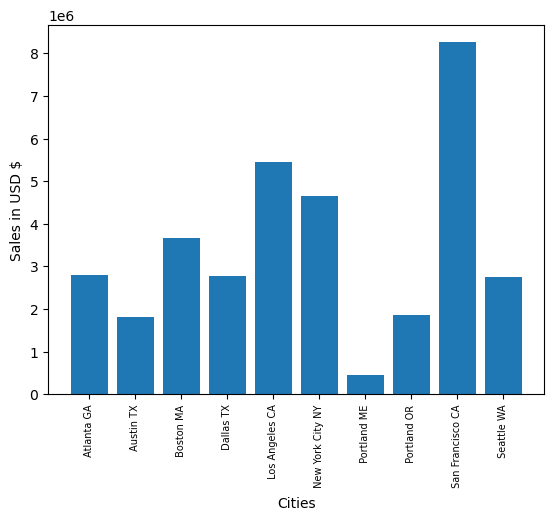

In [64]:
import matplotlib.pyplot as plt
city = [city for city , df in sales.groupby('City')]
plt.bar(city , results['Sales'])
plt.xticks(city,rotation= 'vertical',size =7)
plt.ylabel("Sales in USD $")
plt.xlabel("Cities")
plt.show()

In [65]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [68]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%Y-%m-%d')


In [69]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [71]:
sales['Hour'] = sales['Order Date'].dt.hour
sales['Minute'] = sales['Order Date'].dt.minute
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59


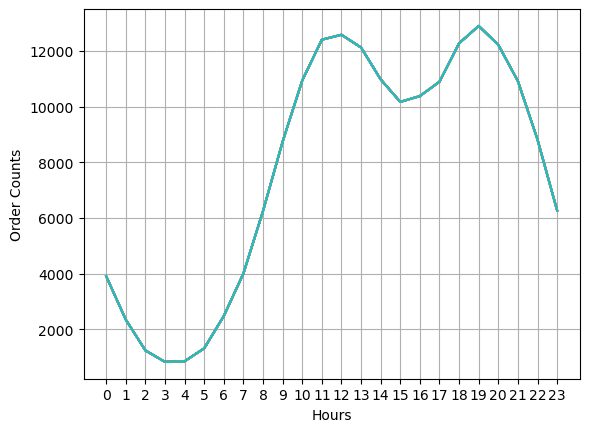

In [77]:
hour = [hour for hour , df in sales.groupby('Hour')]
plt.plot(hour , sales.groupby(['Hour']).count())
plt.xticks(hour)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Order Counts")
plt.show()

In [78]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59


In [83]:
duplicates = sales[sales['Order ID'].duplicated(keep=False)]
duplicates['Grouped']= duplicates.groupby('Order ID')['Product'].transform(lambda x : ",".join(x))
duplicates = duplicates[['Order ID' , 'Grouped']].drop_duplicates()
duplicates

C:\Users\Home\AppData\Local\Temp\ipykernel_19212\3945401290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['Grouped']= duplicates.groupby('Order ID')['Product'].transform(lambda x : ",".join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186710,319536,"Macbook Pro Laptop,Wired Headphones"
186731,319556,"Google Phone,Wired Headphones"
186760,319584,"iPhone,Wired Headphones"
186773,319596,"iPhone,Lightning Charging Cable"


In [86]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in duplicates['Grouped']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
for key , value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [87]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59
